In [1]:
import os

In [2]:
os.chdir("/content/drive/MyDrive/Final_year_project")

In [ ]:
os.mkdir("data")

FileExistsError: [Errno 17] File exists: 'data'

In [3]:
    current_directory = os.getcwd()
    print(current_directory)

/content/drive/MyDrive/Final_year_project


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("data/heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [13]:
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
564,56,1,0,132,184,0,0,105,1,2.1,1,1,1,0
231,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
856,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
738,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0
398,66,1,0,160,228,0,0,138,0,2.3,2,0,1,1
152,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0
678,41,0,2,112,268,0,0,172,1,0.0,2,0,2,1
676,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
114,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
831,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.isnull().sum()*100/len(df)

,0
age,0.0
sex,0.0
cp,0.0
trestbps,0.0
chol,0.0
fbs,0.0
restecg,0.0
thalach,0.0
exang,0.0
oldpeak,0.0


In [10]:
X = df.drop('target',axis=1)
y = df['target']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [6]:
import joblib

In [8]:
os.chdir("/content/drive/MyDrive/Final_year_project/models")

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
def model_trainer(name,model,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  print(f"Accuracy of {name} is {acc}")
  print(classification_report(y_test,y_pred))

In [ ]:
os.chdir("/content/drive/MyDrive/Final_year_project/data")

In [ ]:
X_train_df = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, columns=X_test.columns)

In [ ]:
X_train_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.405034,0.648956,1.977486,0.947890,-0.058677,-0.422091,-0.971846,1.258177,-0.720082,-0.212795,0.970286,1.174275,-0.514423
1,1.262700,-1.540937,1.011710,0.832696,0.595166,-0.422091,-0.971846,0.128065,-0.720082,-0.928291,-0.666822,0.216160,-0.514423
2,-0.182322,0.648956,1.011710,-0.088854,-0.020216,2.369157,-0.971846,1.040848,-0.720082,-0.928291,0.970286,2.132389,-0.514423
3,0.373456,-1.540937,-0.919843,-1.816760,0.018246,-0.422091,-0.971846,-1.175910,-0.720082,-0.033921,-0.666822,-0.741955,-0.514423
4,-0.182322,0.648956,-0.919843,-0.492032,0.672089,-0.422091,0.921061,-2.349489,1.388730,0.860450,-0.666822,1.174275,1.101771
...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,-0.626945,0.648956,1.011710,-0.780016,-1.885593,-0.422091,-0.971846,-1.002047,-0.720082,-0.212795,0.970286,2.132389,-0.514423
816,1.373856,-1.540937,1.011710,-0.952807,6.095144,-0.422091,-0.971846,0.475792,-0.720082,0.502702,-0.666822,-0.741955,1.101771
817,1.151545,0.648956,1.977486,0.371921,0.672089,2.369157,-0.971846,1.084314,-0.720082,0.323827,-0.666822,0.216160,-0.514423
818,1.373856,0.648956,-0.919843,-0.664822,-0.193292,-0.422091,0.921061,-3.392669,-0.720082,-0.033921,-0.666822,-0.741955,-0.514423


In [ ]:
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

In [ ]:
y_train_df.to_csv("y_train.csv", index=False)
y_test_df.to_csv("y_test.csv", index=False)

In [ ]:
X_train_df.to_csv("X_train_sc.csv", index=False)
X_test_df.to_csv("X_test_sc.csv", index=False)

In [ ]:
# If X_train is a DataFrame, use its columns; otherwise provide names
X_train_sc_df = pd.DataFrame(X_train_sc, columns=X_train.columns)
y_train_df = pd.DataFrame(y_train).reset_index(drop=True)   # ensure simple 0..n-1 index

train_df = pd.concat([X_train_sc_df, y_train_df], axis=1)
train_df.to_csv("train_scaled.csv", index=False)

# Same for test
X_test_sc_df = pd.DataFrame(X_test_sc, columns=X_test.columns)
y_test_df = pd.DataFrame(y_test).reset_index(drop=True)

test_df = pd.concat([X_test_sc_df, y_test_df], axis=1)
test_df.to_csv("test_scaled.csv", index=False)

In [ ]:
# seperatly
pd.DataFrame(X_train_sc, columns=X_train.columns).to_csv("X_train_sc_.csv", index=False)
pd.DataFrame(X_test_sc,  columns=X_test.columns).to_csv("X_test_sc_.csv",  index=False)

# give y a name so reload is easy
pd.DataFrame(y_train, columns=['target']).to_csv("y_train_.csv", index=False)
pd.DataFrame(y_test,  columns=['target']).to_csv("y_test_.csv",  index=False)


In [ ]:
lr = LogisticRegression(max_iter=1000)
model_trainer("Logistic Regression",lr)

Accuracy of Logistic Regression is 0.8634146341463415
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [ ]:
model_trainer("Logistic Regression",LogisticRegression(max_iter=10000),X_train_sc,y_train,X_test_sc,y_test)

Accuracy of Logistic Regression is 0.8634146341463415
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [ ]:
model_trainer("SVC",SVC(),X_train=X_train_sc,X_test=X_test_sc)

Accuracy of SVC is 0.9658536585365853
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        98
           1       0.95      0.99      0.97       107

    accuracy                           0.97       205
   macro avg       0.97      0.96      0.97       205
weighted avg       0.97      0.97      0.97       205



In [ ]:
svc = SVC()
model_trainer("SVC",svc,X_train=X_train_sc,X_test=X_test_sc)

Accuracy of SVC is 0.9658536585365853
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        98
           1       0.95      0.99      0.97       107

    accuracy                           0.97       205
   macro avg       0.97      0.96      0.97       205
weighted avg       0.97      0.97      0.97       205



In [ ]:
knn = KNeighborsClassifier()
model_trainer("knn",knn,X_train=X_train_sc,X_test=X_test_sc)

Accuracy of knn is 0.8829268292682927
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        98
           1       0.87      0.91      0.89       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [ ]:
dt = DecisionTreeClassifier()
model_trainer("Decision Tree",dt,X_train=X_train_sc,X_test=X_test_sc)

Accuracy of Decision Tree is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [ ]:
forest = RandomForestClassifier()
model_trainer("Random Forest",forest,X_train=X_train_sc,X_test=X_test_sc)

Accuracy of Random Forest is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [ ]:
ada = AdaBoostClassifier()
model_trainer("AdaBoost",ada,X_train=X_train_sc,X_test=X_test_sc)

Accuracy of AdaBoost is 0.8829268292682927
              precision    recall  f1-score   support

           0       0.90      0.85      0.87        98
           1       0.87      0.92      0.89       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [ ]:
gradient_boost = GradientBoostingClassifier()
model_trainer("Gradient Boost",gradient_boost,X_train=X_train_sc,X_test=X_test_sc)

Accuracy of Gradient Boost is 0.9902439024390244
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        98
           1       0.98      1.00      0.99       107

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
xgb = XGBClassifier()
model_trainer("XGBoost",xgb,X_train=X_train_sc,X_test=X_test_sc)

Accuracy of XGBoost is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [ ]:
gauss = GaussianNB()
model_trainer("Naive Bayes",gauss,X_train=X_train_sc,X_test=X_test_sc)

Accuracy of Naive Bayes is 0.8536585365853658
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



In [ ]:
os.chdir('/content/drive/MyDrive/Final_year_project/models')

In [ ]:
import joblib

In [ ]:
joblib.dump(lr,'logistic_regression.pkl')

['logistic_regression.pkl']

In [ ]:
joblib.dump(svc,'svc.pkl')

['svc.pkl']

In [ ]:
joblib.dump(knn,'knn.pkl')

['knn.pkl']

In [ ]:
joblib.dump(dt,'decision_tree.pkl')

['decision_tree.pkl']

In [ ]:
joblib.dump(forest,'random_forest.pkl')

['random_forest.pkl']

In [ ]:
joblib.dump(ada,'ada_boost.pkl')

['ada_boost.pkl']

In [ ]:
joblib.dump(gradient_boost,'gradient_boost.pkl')

['gradient_boost.pkl']

In [ ]:
joblib.dump(xgb,'xgboost.pkl')

['xgboost.pkl']

In [ ]:
joblib.dump(gauss,'gaussian_nb.pkl')

['gaussian_nb.pkl']

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, X, y, cv=5)  # 5-fold CV
print("CV scores:", scores)
print("Mean CV accuracy:", scores.mean())

CV scores: [0.9804878 1.        1.        1.        1.       ]
Mean CV accuracy: 0.9960975609756098


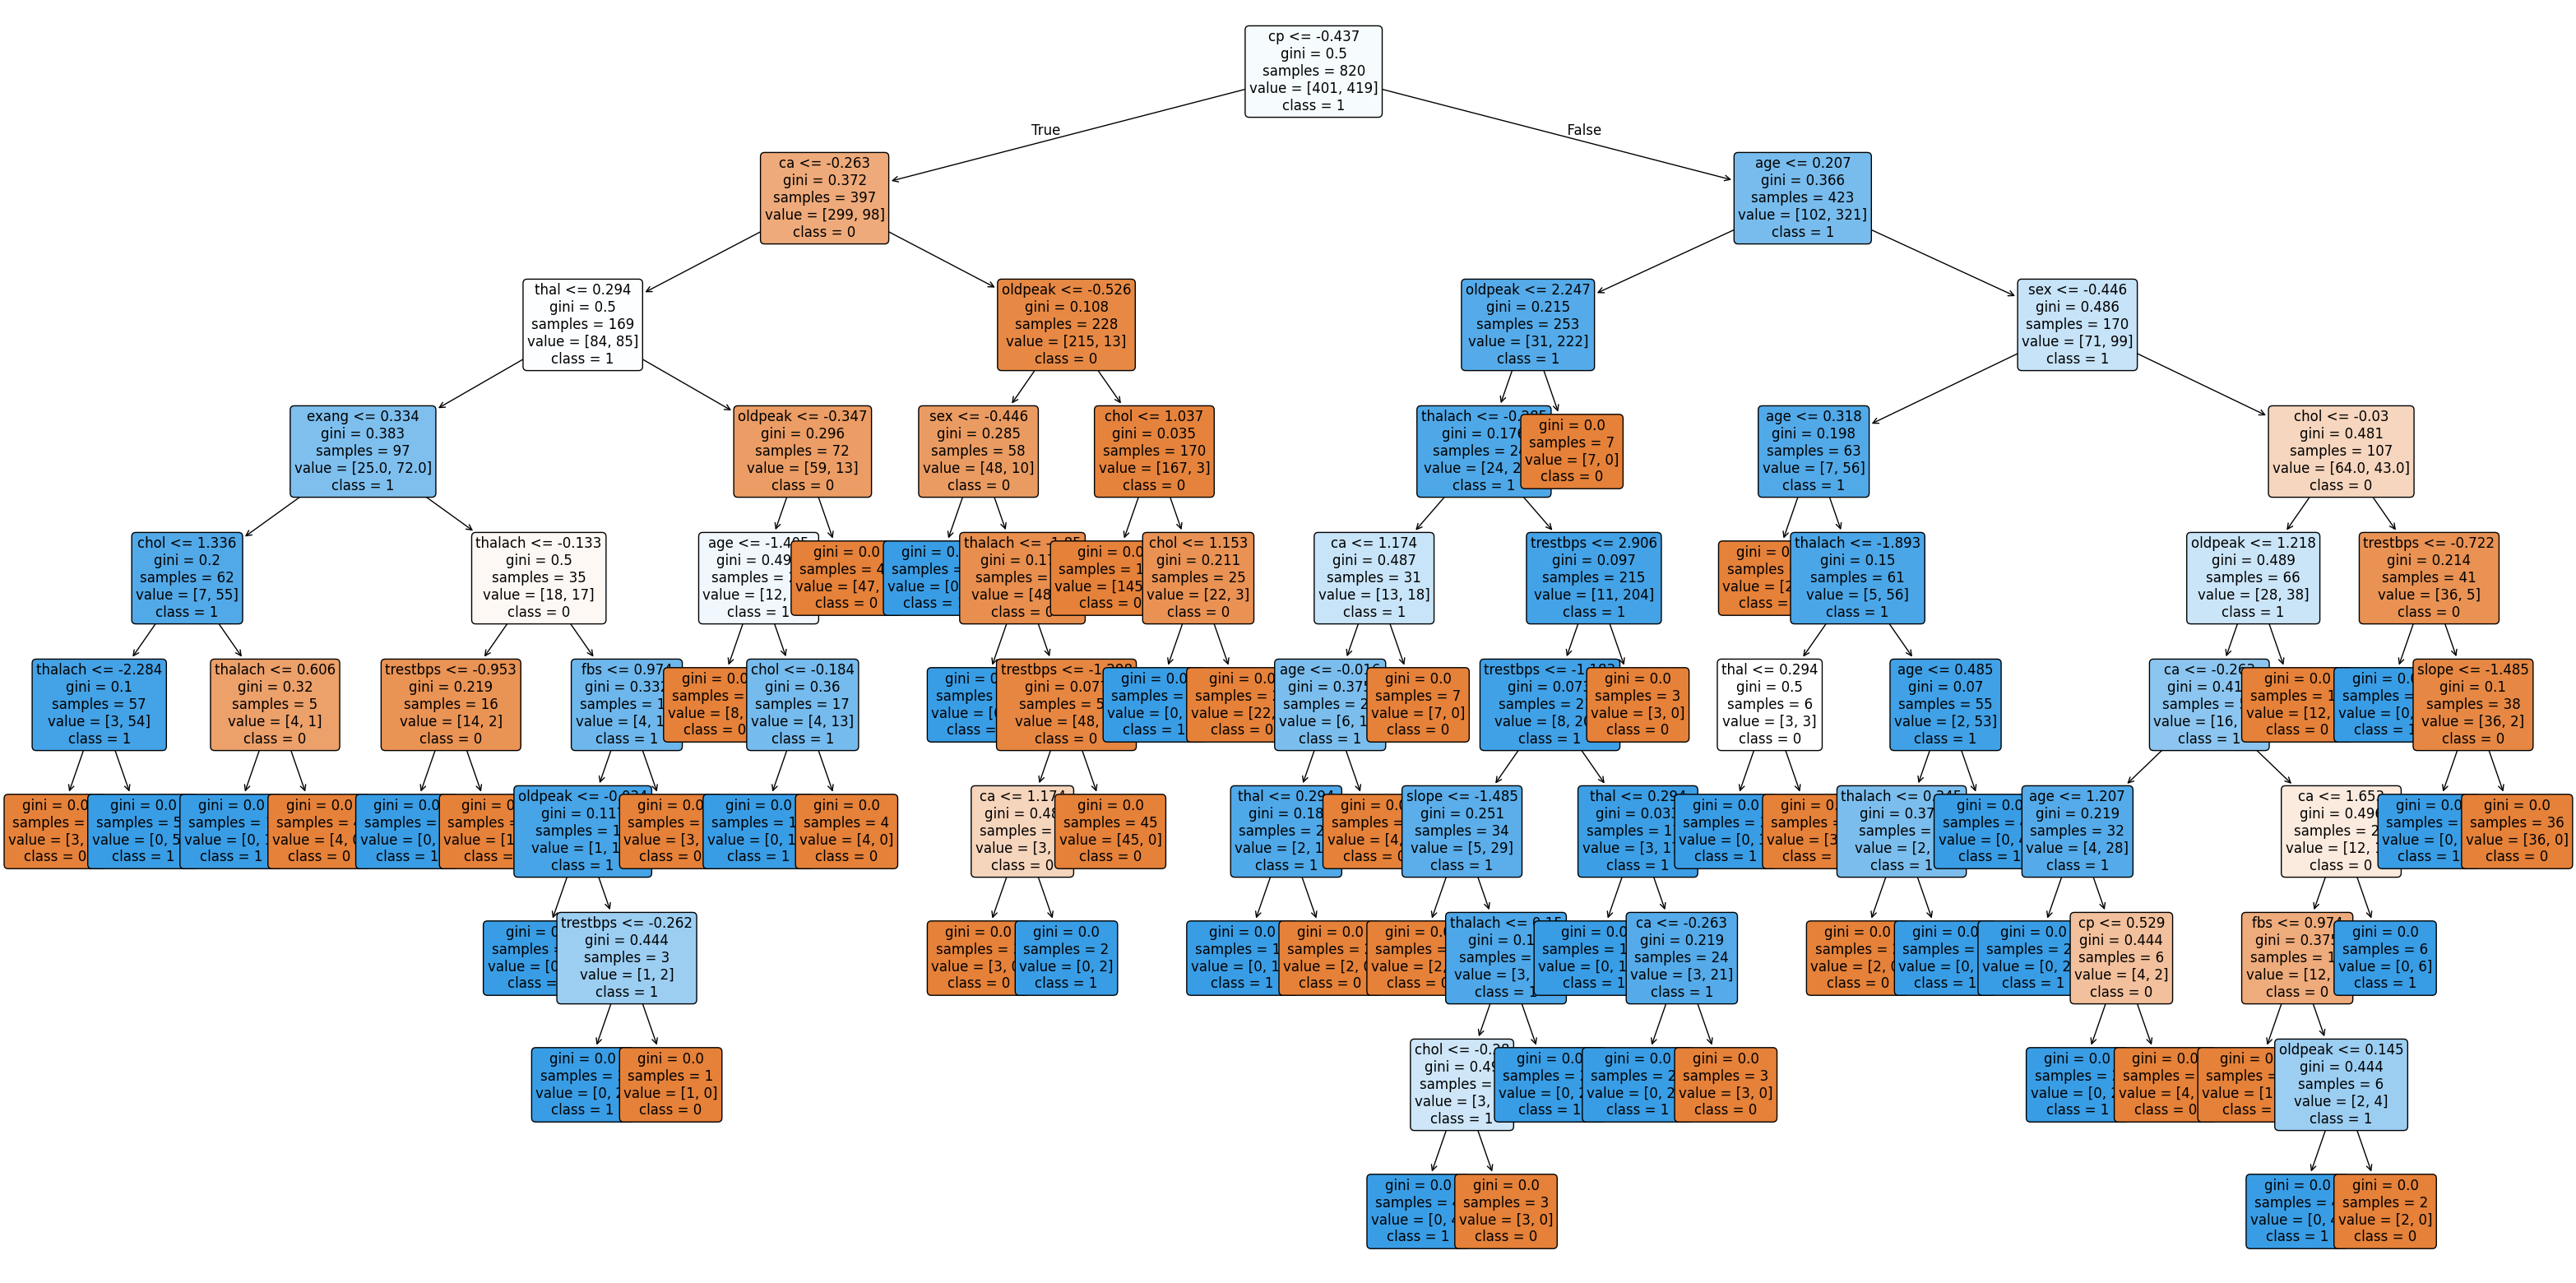

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,20))  # big figure for clarity
plot_tree(
    dt,
    feature_names=X.columns,  # show actual feature names
    class_names=['0', '1'],  # your target classes
    filled=True,             # color by class
    rounded=True,            # rounded boxes
    fontsize=12
)
plt.show()


In [ ]:
X_train_sc

array([[-1.40503359,  0.64895597,  1.97748631, ...,  0.97028605,
         1.17427458, -0.5144228 ],
       [ 1.26270023, -1.5409366 ,  1.01170979, ..., -0.6668221 ,
         0.21616   , -0.5144228 ],
       [-0.18232226,  0.64895597,  1.01170979, ...,  0.97028605,
         2.13238916, -0.5144228 ],
       ...,
       [ 1.15154465,  0.64895597,  1.97748631, ..., -0.6668221 ,
         0.21616   , -0.5144228 ],
       [ 1.3738558 ,  0.64895597, -0.91984324, ..., -0.6668221 ,
        -0.74195458, -0.5144228 ],
       [ 0.59576677,  0.64895597,  1.01170979, ..., -0.6668221 ,
        -0.74195458, -0.5144228 ]])

In [ ]:
type(X_train_sc)

numpy.ndarray

In [ ]:
X_train_sc.shape

(820, 13)

In [ ]:
import joblib

In [ ]:
logreg = joblib.load('/content/drive/MyDrive/Final_year_project/models/logistic_regression.pkl')
svc = joblib.load('/content/drive/MyDrive/Final_year_project/models/svc.pkl')
knn = joblib.load('/content/drive/MyDrive/Final_year_project/models/knn.pkl')
dt = joblib.load('/content/drive/MyDrive/Final_year_project/models/decision_tree.pkl')
gnb = joblib.load('/content/drive/MyDrive/Final_year_project/models/gaussian_nb.pkl')
rf = joblib.load('/content/drive/MyDrive/Final_year_project/models/random_forest.pkl')
ada = joblib.load('/content/drive/MyDrive/Final_year_project/models/ada_boost.pkl')
grad = joblib.load('/content/drive/MyDrive/Final_year_project/models/gradient_boost.pkl')
xgb = joblib.load('/content/drive/MyDrive/Final_year_project/models/xgboost.pkl')

In [ ]:
def get_acc(model,X_test=X_test_sc,y_test=y_test):
  y_pred = model.predict(X_test)
  acc = accuracy_score(y_test,y_pred)
  return acc

In [ ]:
rfacc = get_acc(rf)
print(rfacc)

1.0


In [ ]:
acc_scores = {
    "Logistic Regression": get_acc(logreg),
    "SVC": get_acc(svc),
    "KNN": get_acc(knn),
    "Decision Tree": get_acc(dt),
    "Random Forest": get_acc(rf),
    "AdaBoost": get_acc(ada),
    "Gradient Boost": get_acc(grad),
    "XGBoost": get_acc(xgb),
    "Naive Bayes": get_acc(gnb)
}
print(acc_scores)

{'Logistic Regression': 0.7317073170731707, 'SVC': 0.9658536585365853, 'KNN': 0.8829268292682927, 'Decision Tree': 1.0, 'Random Forest': 1.0, 'AdaBoost': 0.8829268292682927, 'Gradient Boost': 0.9902439024390244, 'XGBoost': 1.0, 'Naive Bayes': 0.8536585365853658}


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
acc_df = pd.DataFrame(list(acc_scores.items()), columns=['Model', 'Accuracy'])
acc_df = acc_df.sort_values(by='Accuracy',ascending=False)
acc_df

,Model,Accuracy
4,Random Forest,1.000000
7,XGBoost,1.000000
3,Decision Tree,1.000000
6,Gradient Boost,0.990244
1,SVC,0.965854
5,AdaBoost,0.882927
2,KNN,0.882927
8,Naive Bayes,0.853659
0,Logistic Regression,0.731707


In [ ]:
os.chdir('/content/drive/MyDrive/Final_year_project/results')

In [ ]:
acc_df.to_csv('base_model_accuracy_scores.csv', index=False)